In [1]:
#K-means en Python

#Codigo extraido de :
#https://www.youtube.com/watch?v=w2wzVg0owxU&index=19

#Buscaremos la forma en que nuestros datos de likes y calificación
#que tienen algunas peliculas, se puedan agrupar en clusters

#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #Algoritmo


In [2]:
#Importemos el dataset
peliculas=pd.read_csv("movies.csv")
peliculas.head(10)

,num,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Color,James Cameron,723.0,178.0,0,855.0,Joel David Moore,1000,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936,7.9,1.78,33000
1,2,Color,Gore Verbinski,302.0,169.0,563,1000.0,Orlando Bloom,40000,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000,7.1,2.35,0
2,3,Color,Sam Mendes,602.0,148.0,0,161.0,Rory Kinnear,11000,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393,6.8,2.35,85000
3,4,Color,Christopher Nolan,813.0,164.0,22000,23000.0,Christian Bale,27000,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000,8.5,2.35,164000
4,5,Color,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,NaN,0
5,6,Color,Andrew Stanton,462.0,132.0,475,530.0,Samantha Morton,640,73058679.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632,6.6,2.35,24000
6,7,Color,Sam Raimi,392.0,156.0,0,4000.0,James Franco,24000,336530303.0,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000,6.2,2.35,0
7,8,Color,Nathan Greno,324.0,100.0,15,284.0,Donna Murphy,799,200807262.0,...,387.0,English,USA,PG,260000000.0,2010.0,553,7.8,1.85,29000
8,9,Color,Joss Whedon,635.0,141.0,0,19000.0,Robert Downey Jr.,26000,458991599.0,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000,7.5,2.35,118000
9,10,Color,David Yates,375.0,153.0,282,10000.0,Daniel Radcliffe,25000,301956980.0,...,973.0,English,UK,PG,250000000.0,2009.0,11000,7.5,2.35,10000


In [3]:
#Creamos un dataframe en el cual solo tengamos las variables de facebook likes y 
#imdb_score
data=peliculas.drop(["num","color",
                     "director_name",
                     "num_critic_for_reviews",
                     "duration",
                     "director_facebook_likes",
                    "actor_3_facebook_likes",
                    "actor_2_name",
                    "actor_1_facebook_likes",
                    "gross",
                    "num_user_for_reviews",
                    "actor_1_name",
                    "movie_title",
                    "num_voted_users",
                     "genres",
                     "movie_facebook_likes",
                     "actor_3_name",
                     "facenumber_in_poster",
                     "plot_keywords",
                     "movie_imdb_link",
                     "language",
                     "country",
                     "content_rating",
                     "budget",
                     "title_year",
                     "actor_2_facebook_likes",
                     "aspect_ratio"
                    ],axis=1)
data.head(10)
    

,cast_total_facebook_likes,imdb_score
0,4834,7.9
1,48350,7.1
2,11700,6.8
3,106759,8.5
4,143,7.1
5,1873,6.6
6,46055,6.2
7,2036,7.8
8,92000,7.5
9,58753,7.5


In [4]:
#agreguemos los datos a las variables X y Y
#Y posteriormente haremos una pequeña exploración a una variable

df=pd.DataFrame(data)
x=df["cast_total_facebook_likes"].values
y=df["imdb_score"].values
print("Valor máximo de likes: ",df["cast_total_facebook_likes"].max())
print("Valor minimo de likes: ",df["cast_total_facebook_likes"].min())
print("Valor promedio de likes: ",df["cast_total_facebook_likes"].mean())

Valor máximo de likes:  106759
Valor minimo de likes:  143
Valor promedio de likes:  34880.666666666664


In [5]:
#Creemos un arreglo con nuestras 2 variables

#Para esto tenemos 2 formas
#Forma 1:
info=df[["cast_total_facebook_likes","imdb_score"]].as_matrix()
print(info)

[[4.83400e+03 7.90000e+00]
 [4.83500e+04 7.10000e+00]
 [1.17000e+04 6.80000e+00]
 [1.06759e+05 8.50000e+00]
 [1.43000e+02 7.10000e+00]
 [1.87300e+03 6.60000e+00]
 [4.60550e+04 6.20000e+00]
 [2.03600e+03 7.80000e+00]
 [9.20000e+04 7.50000e+00]
 [5.87530e+04 7.50000e+00]
 [2.44500e+04 6.90000e+00]
 [2.99910e+04 6.10000e+00]
 [2.02300e+03 6.70000e+00]
 [4.84860e+04 7.30000e+00]
 [4.57570e+04 6.50000e+00]]


/home/angel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [6]:
#Forma 2:
X=np.array(list(zip(x,y)))
print(X)

[[4.83400e+03 7.90000e+00]
 [4.83500e+04 7.10000e+00]
 [1.17000e+04 6.80000e+00]
 [1.06759e+05 8.50000e+00]
 [1.43000e+02 7.10000e+00]
 [1.87300e+03 6.60000e+00]
 [4.60550e+04 6.20000e+00]
 [2.03600e+03 7.80000e+00]
 [9.20000e+04 7.50000e+00]
 [5.87530e+04 7.50000e+00]
 [2.44500e+04 6.90000e+00]
 [2.99910e+04 6.10000e+00]
 [2.02300e+03 6.70000e+00]
 [4.84860e+04 7.30000e+00]
 [4.57570e+04 6.50000e+00]]


In [7]:
#Comencemos con nuestro modelo
kmeans=KMeans(n_clusters=2)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

colors=["m.","r.","c.","y.","b."]



Coordenada:  [4834.     7.9]  Label:  0
Coordenada:  [4.835e+04 7.100e+00]  Label:  1
Coordenada:  [1.17e+04 6.80e+00]  Label:  0
Coordenada:  [1.06759e+05 8.50000e+00]  Label:  1
Coordenada:  [143.    7.1]  Label:  0
Coordenada:  [1873.     6.6]  Label:  0
Coordenada:  [4.6055e+04 6.2000e+00]  Label:  1
Coordenada:  [2036.     7.8]  Label:  0
Coordenada:  [9.2e+04 7.5e+00]  Label:  1
Coordenada:  [5.8753e+04 7.5000e+00]  Label:  1
Coordenada:  [2.445e+04 6.900e+00]  Label:  0
Coordenada:  [2.9991e+04 6.1000e+00]  Label:  0
Coordenada:  [2023.     6.7]  Label:  0
Coordenada:  [4.8486e+04 7.3000e+00]  Label:  1
Coordenada:  [4.5757e+04 6.5000e+00]  Label:  1


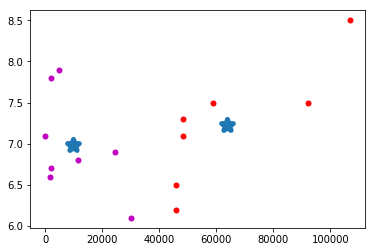

In [8]:
#Visualicemos nuestros datos

for i in range(len(X)):
    print("Coordenada: ",X[i]," Label: ",labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],
            marker="*",s=150,linewidths=5,zorder=10)
plt.show()